# Simple binary image processing

> In this tutorial you will learn some simple binary image processing.

In the [previous tutorial](01_load_threshold_save.ipynb) we learned how to load and save images as well as the simple thresholding operation. This time we will start of with the same image but add 10% of random salt&pepper noise.

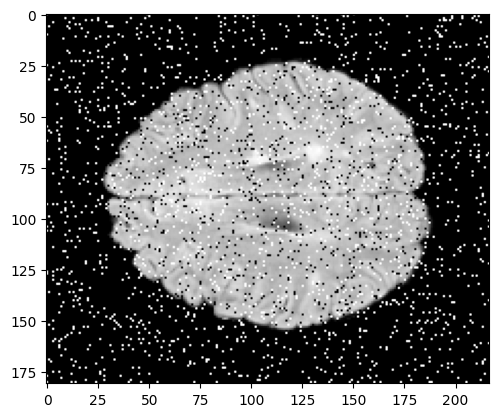

In [1]:
%matplotlib inline

from medpy.io import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

i, h = load("flair.nii.gz")

i[np.random.randint(0, i.shape[0], int(0.05 * i.size)), np.random.randint(0, i.shape[1], int(0.05 * i.size))] = i.min()
i[np.random.randint(0, i.shape[0], int(0.05 * i.size)), np.random.randint(0, i.shape[1], int(0.05 * i.size))] = i.max()

plt.imshow(i, cmap = cm.Greys_r)

Using our previous approach of simply thresholding to obtain the brain mask will fail now.

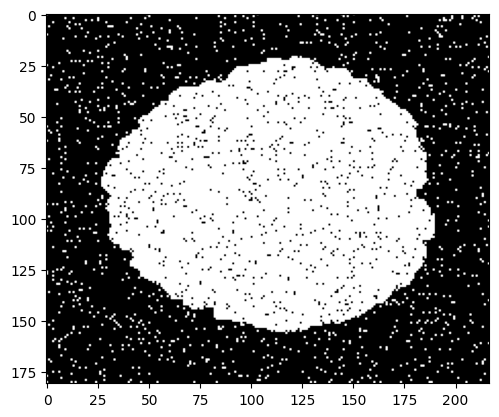

In [2]:
brainmask = i > 0

plt.imshow(brainmask, cmap = cm.Greys_r)

What we instead obtain is a rough estimation of the brain mask with noise speckles. First, let's get rid of the small outliers in the background using **MedPy**'s [largest_connected_component](https://loli.github.io/medpy/generated/medpy.filter.binary.largest_connected_component.html) filter.

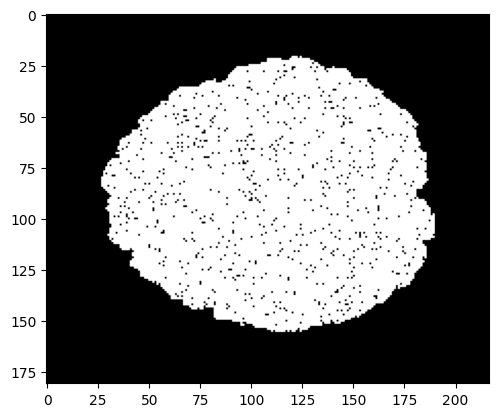

In [3]:
from medpy.filter import largest_connected_component

brainmask = largest_connected_component(brainmask)

plt.imshow(brainmask, cmap = cm.Greys_r)

That already looks better. Note that we could have alternatively used the [size_threshold](http://loli.github.io/medpy/generated/medpy.filter.binary.size_threshold.html) filter, if we had to keep more than a single binary object. Now we can close the inner holes with the help of scipy.

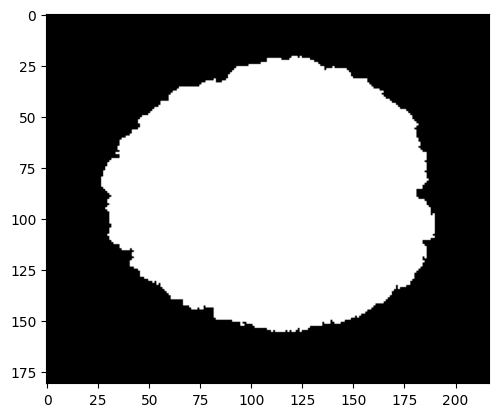

In [4]:
from scipy.ndimage import binary_fill_holes

brainmask = binary_fill_holes(brainmask)

plt.imshow(brainmask, cmap = cm.Greys_r)

And thus, we obtain a smooth brainmask that is (nearly) as good as the one we obtained from the noiseless image.